In [43]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [44]:
import pandas as pd

!gdown --id 1pRVk_O_hy9LVuHNWbDrdagZlI8WgRUNr -O dataset.csv

data = pd.read_csv('dataset.csv')
data

print('Some information about dataset:', data.info())

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pRVk_O_hy9LVuHNWbDrdagZlI8WgRUNr
To: /content/dataset.csv
100% 1.44M/1.44M [00:00<00:00, 42.4MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip

In [45]:
data = data.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns')

data = data.drop(['customer_id', 'city', 'zip_code', 'latitude', 'longitude'], axis=1)

data = data.drop(['churn_category', 'churn_reason'], axis=1)
data.duplicated().sum()

np.int64(0)

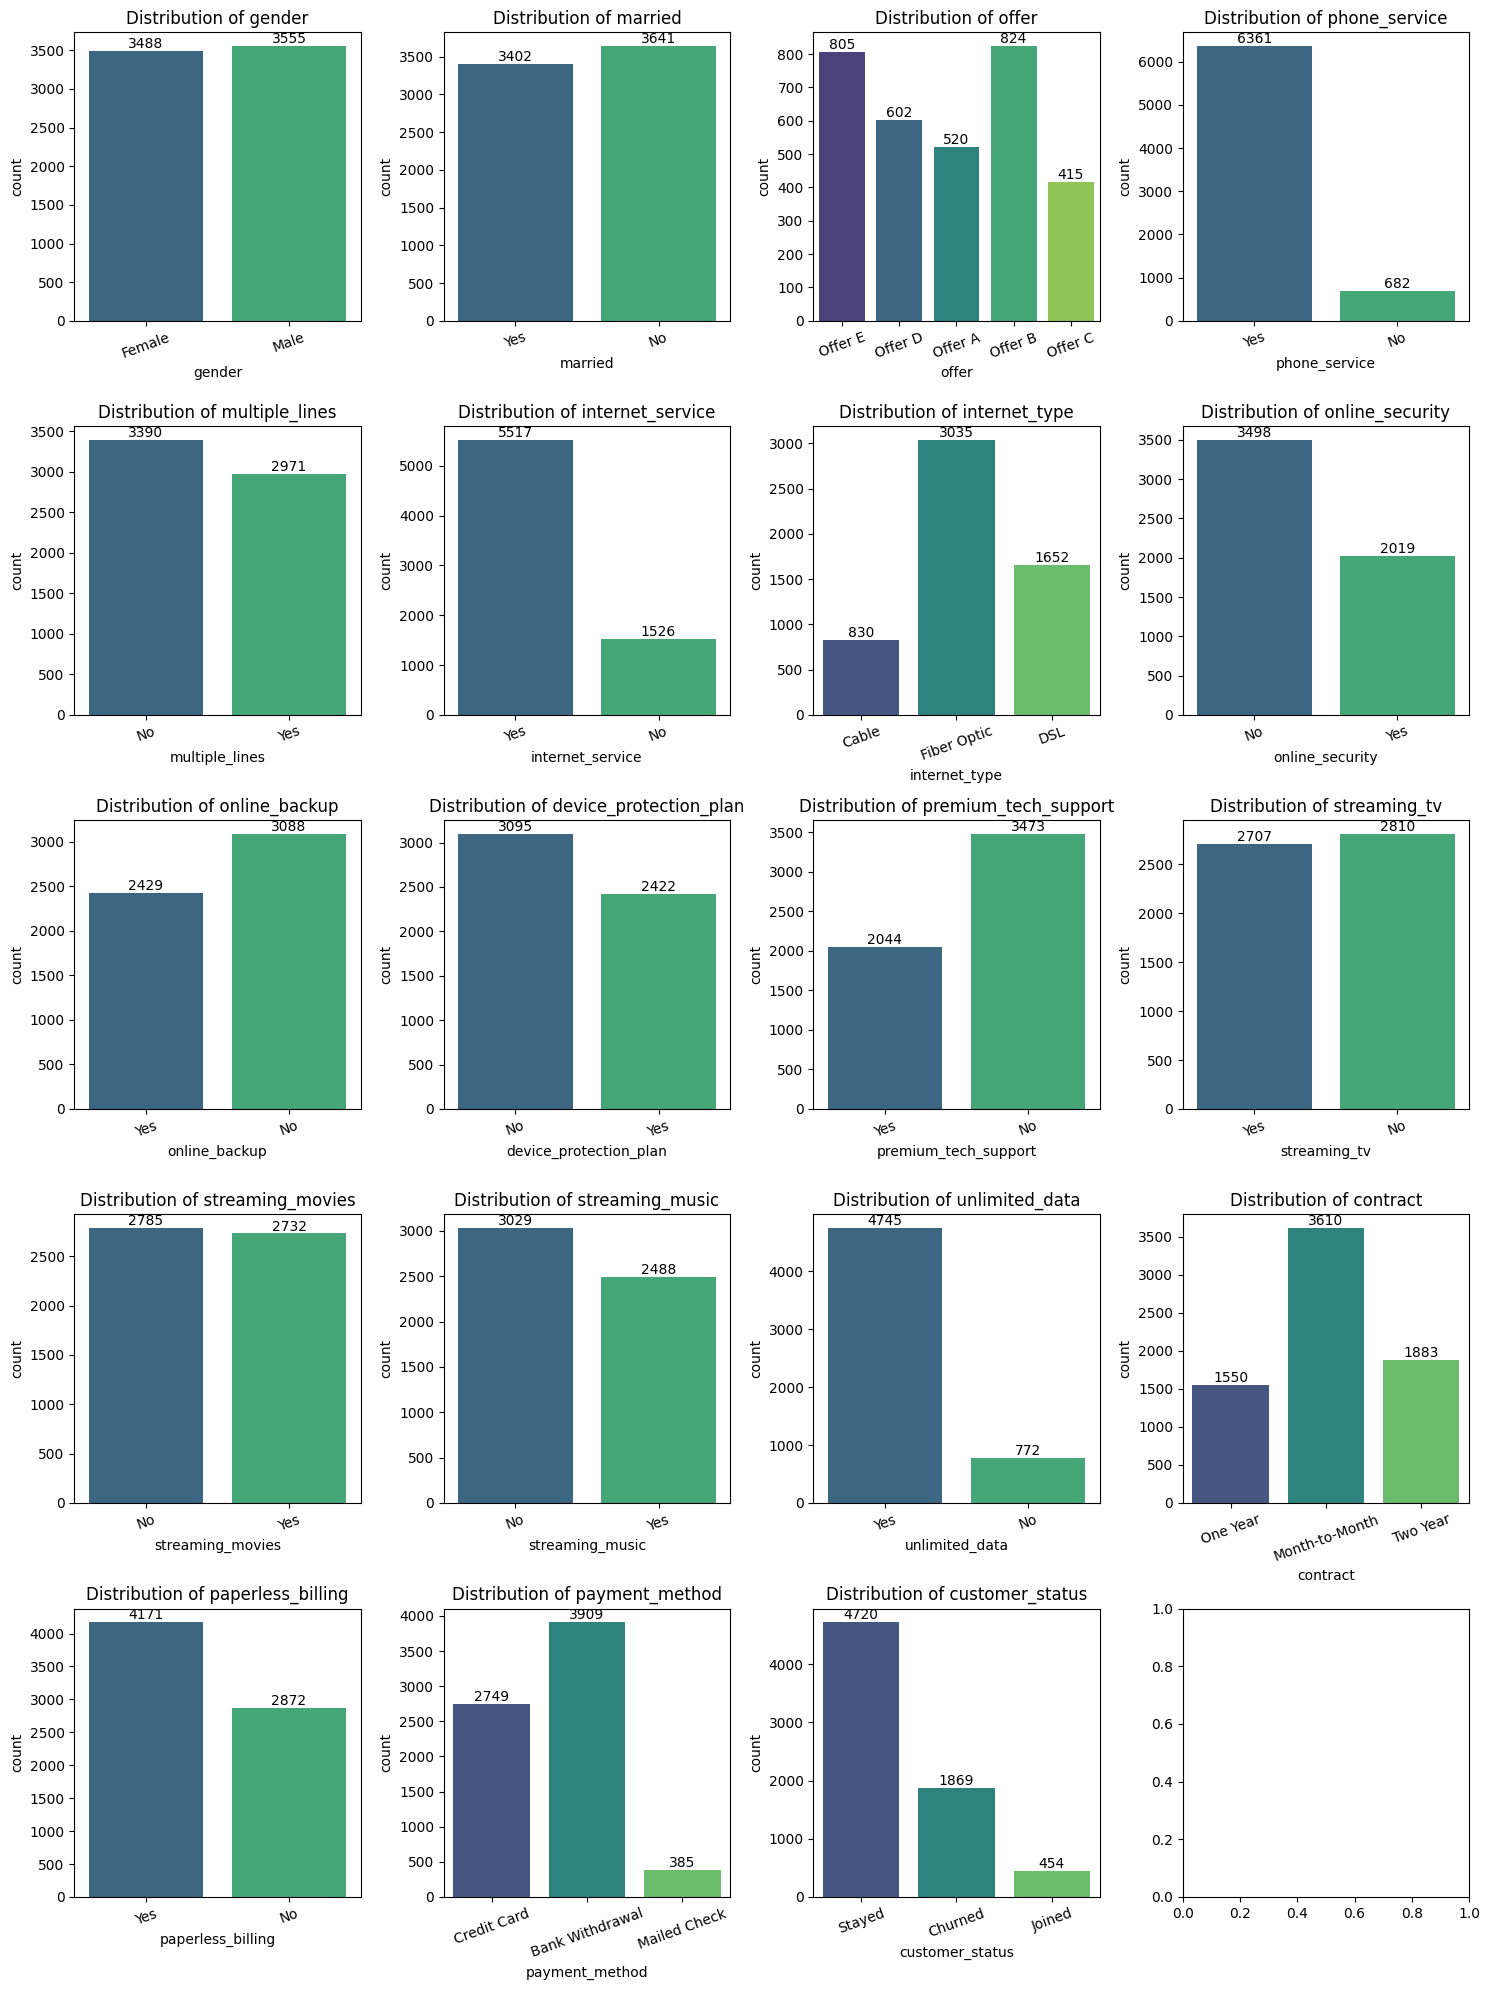

In [46]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(5, 4, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(data.select_dtypes(include=['object']).columns):
    sns.countplot(x=col, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

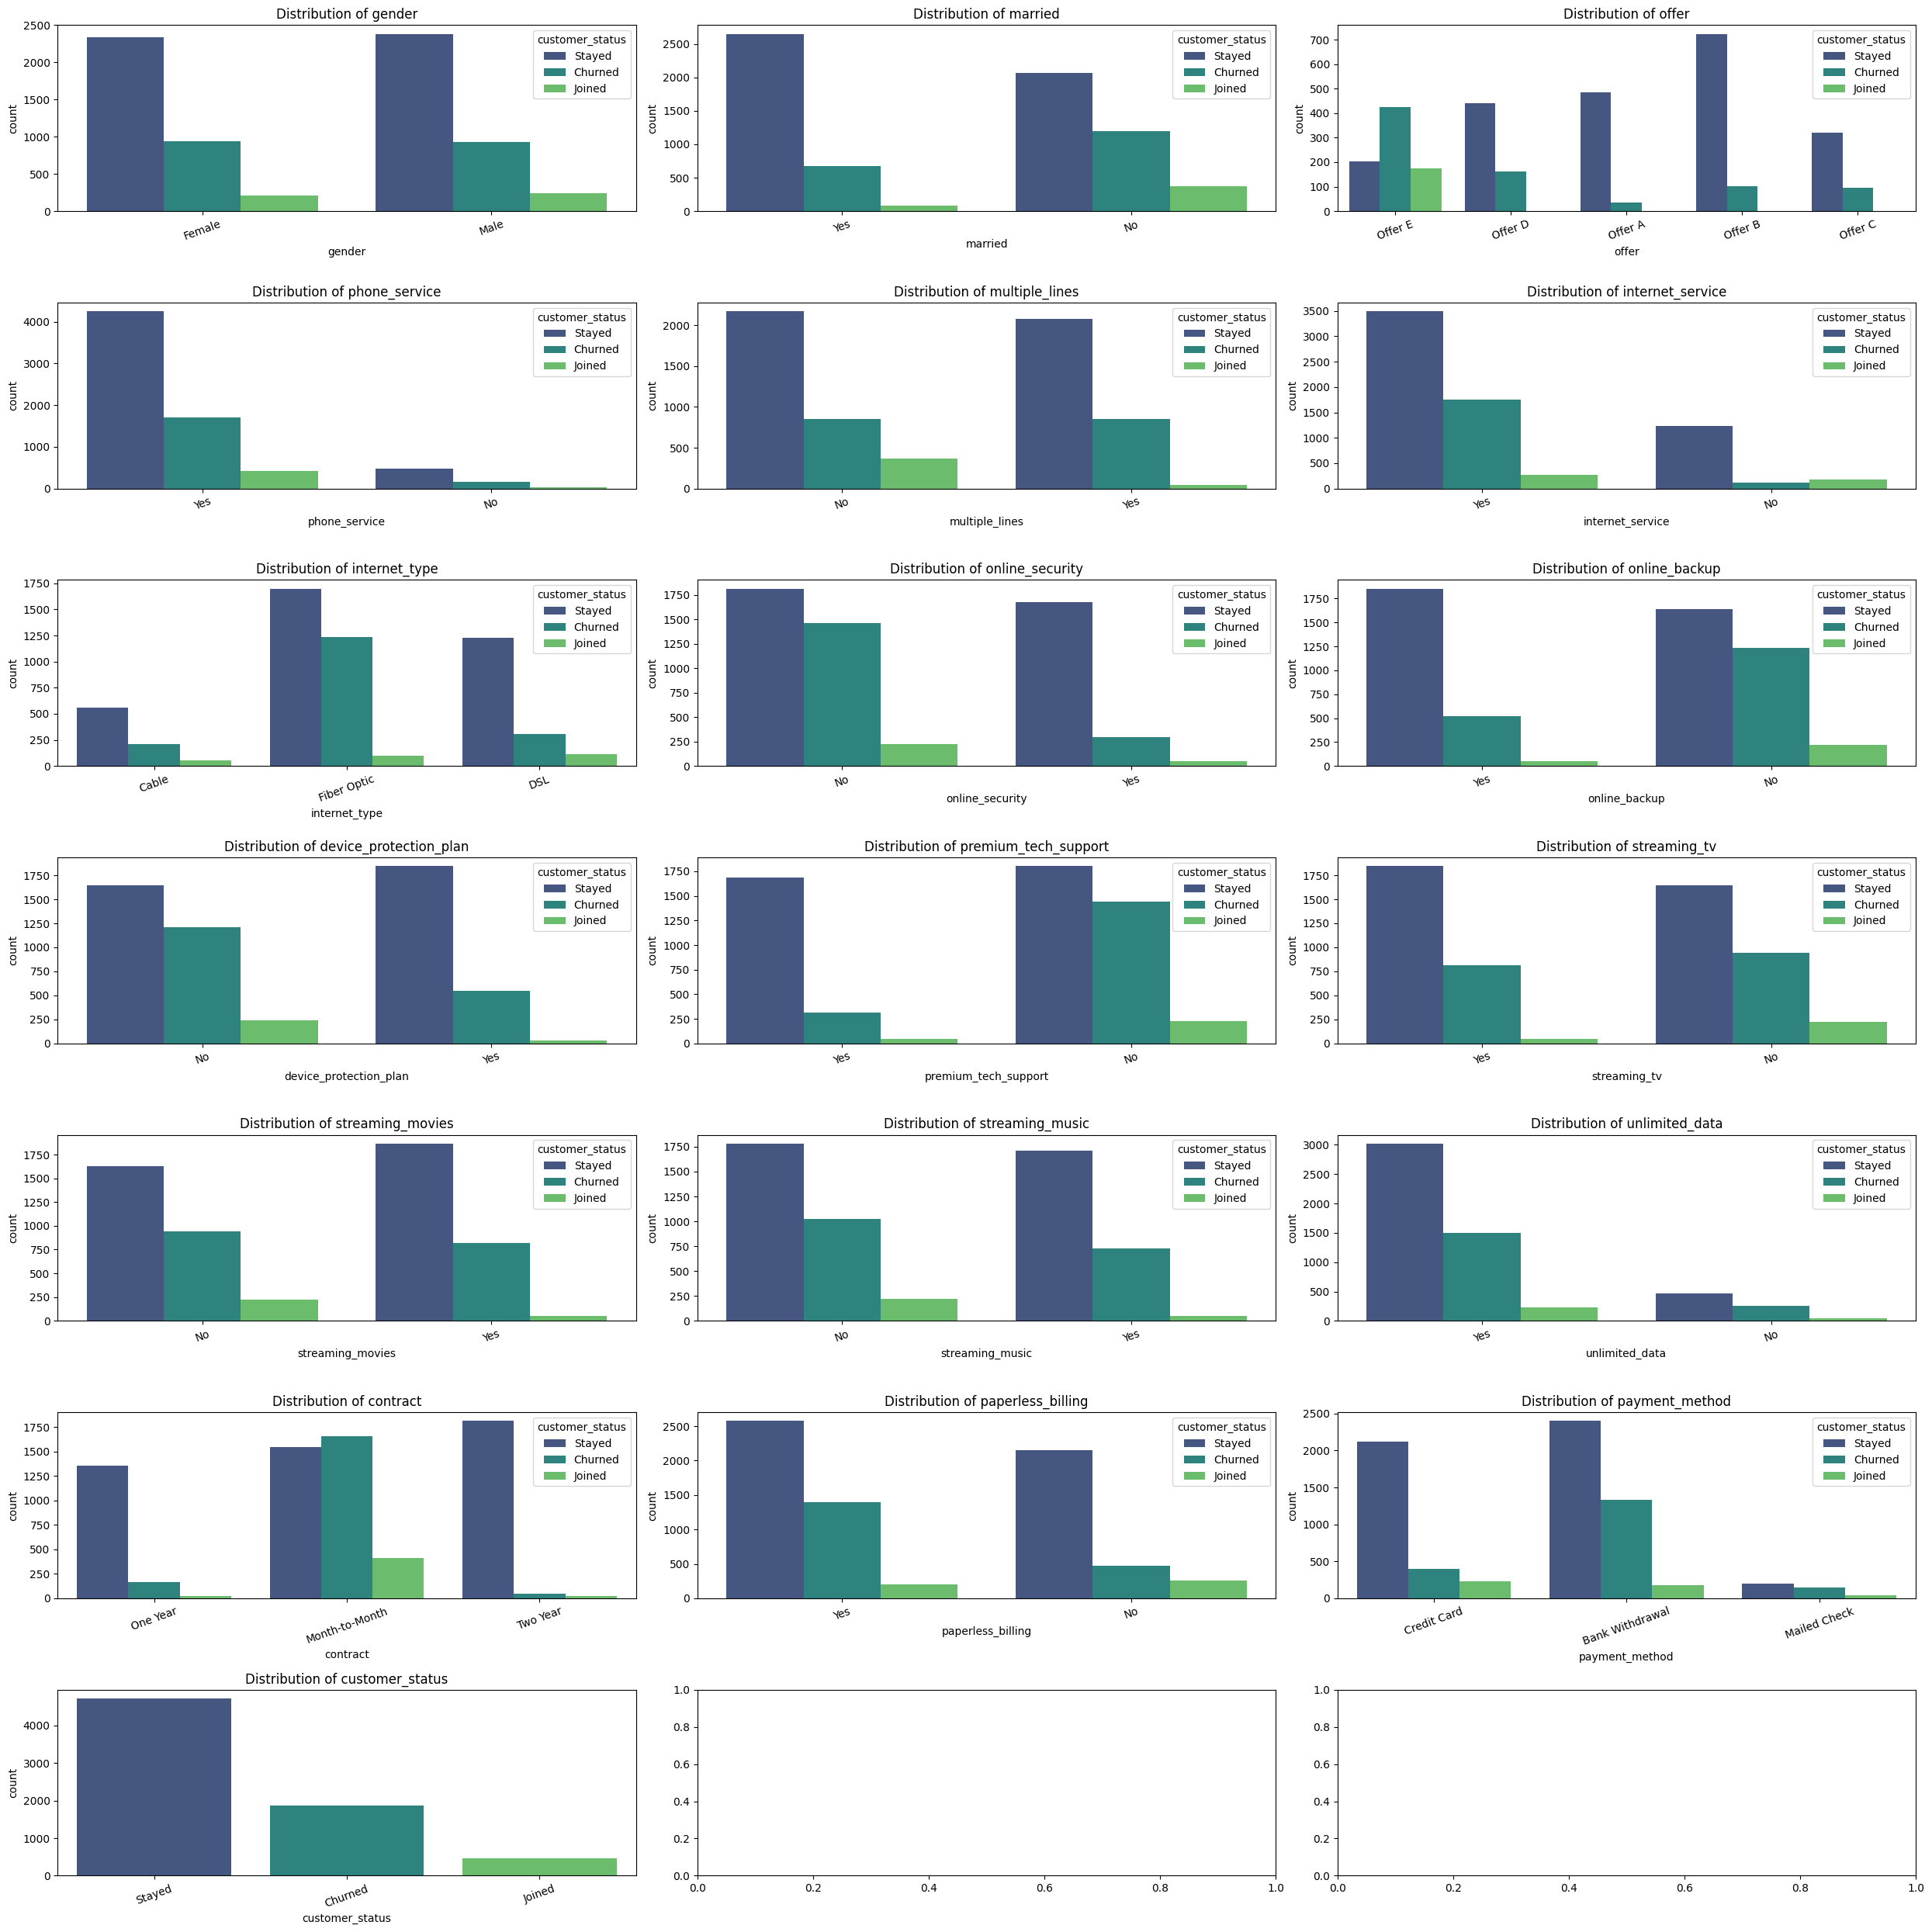

In [47]:


import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(7, 3, figsize=(25, 25))
axes = axes.flatten()

for i, col in enumerate(data.select_dtypes(include=['object']).columns):
    if 'customer_status' in data.columns:
        sns.countplot(x=col, data=data, hue='customer_status', ax=axes[i], palette='viridis')
    else:
        print(f"Warning: 'customer_status' column not found. Skipping countplot for {col}")
        continue

    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

plt.tight_layout()
plt.show()

In [48]:
data.describe(include='O').T

,count,unique,top,freq
gender,7043,2,Male,3555
married,7043,2,No,3641
offer,3166,5,Offer B,824
phone_service,7043,2,Yes,6361
multiple_lines,6361,2,No,3390
internet_service,7043,2,Yes,5517
internet_type,5517,3,Fiber Optic,3035
online_security,5517,2,No,3498
online_backup,5517,2,No,3088
device_protection_plan,5517,2,No,3095


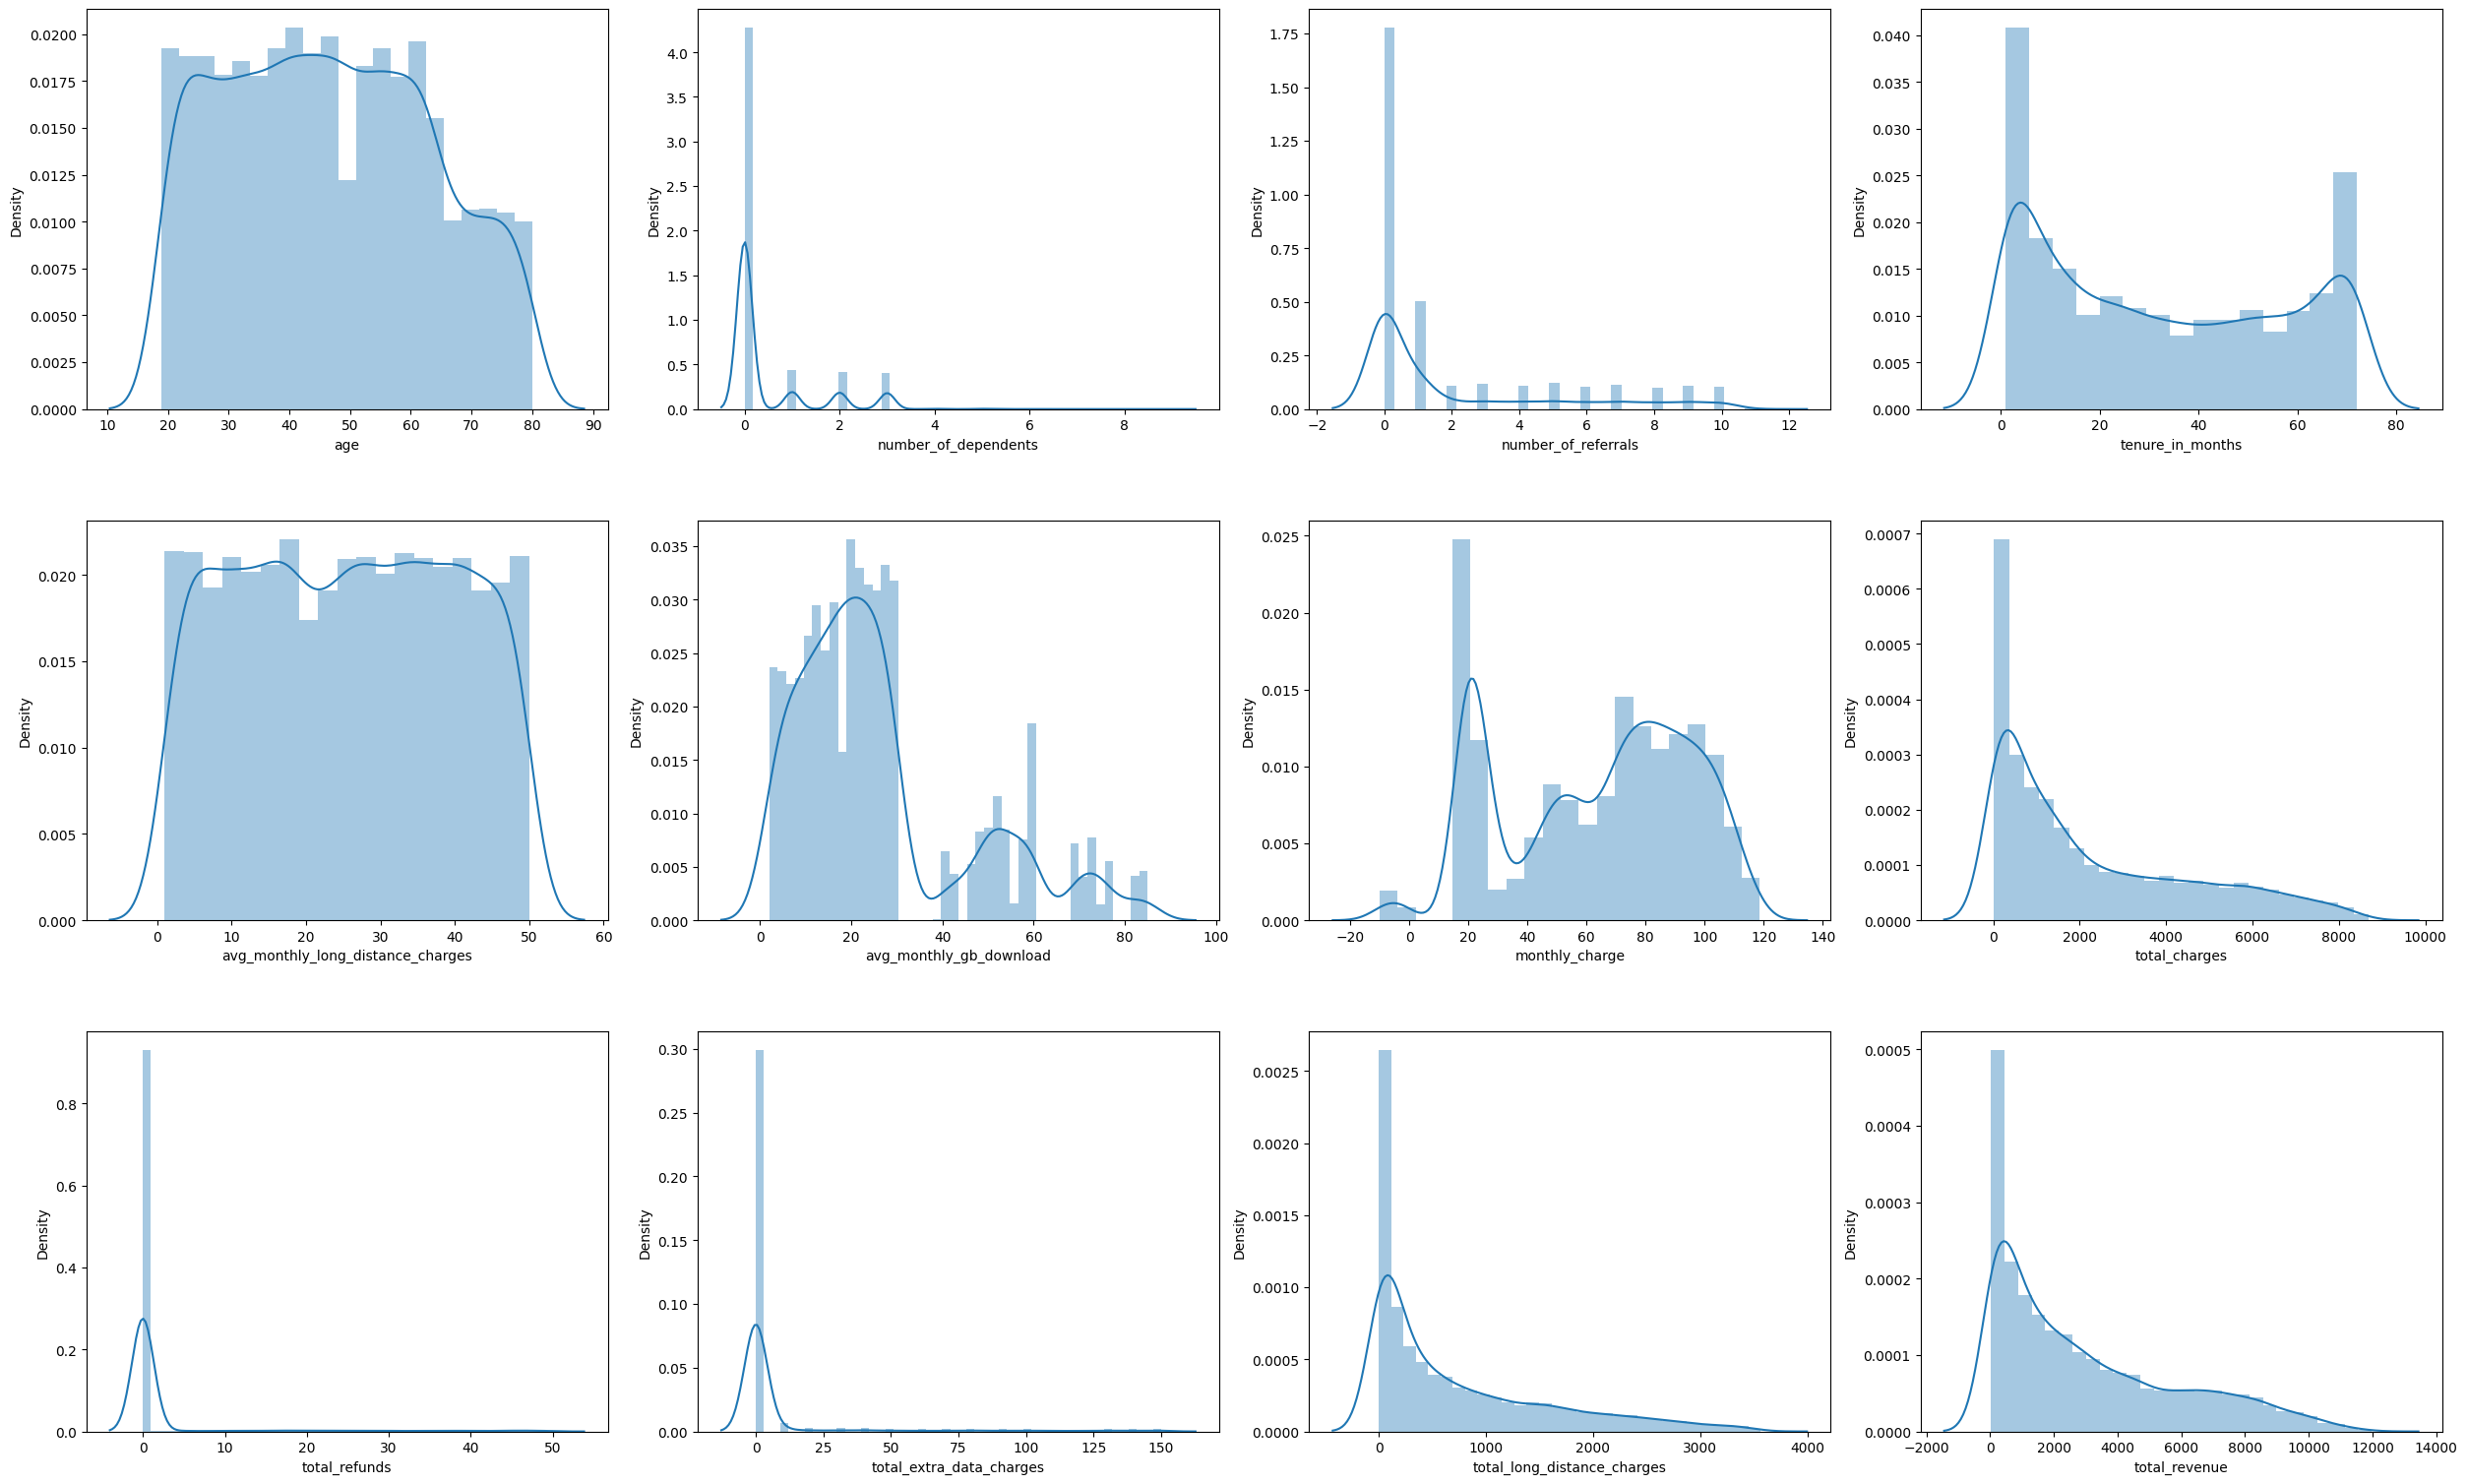

In [49]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,15))
index = 0
axs = axs.flatten()
for k, v in data.select_dtypes(include=['number']).items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

In [50]:
from scipy.stats import trim_mean

groupby_columns = ['age', 'monthly_charge', 'total_charges', 'total_revenue', 'total_refunds']

groupby_result = data.groupby('customer_status')[groupby_columns].agg(lambda x: trim_mean(x, 0.05))

print("Groupby:")
groupby_result

Groupby:


,age,monthly_charge,total_charges,total_revenue,total_refunds
customer_status,,,,,
Churned,49.749257,74.780303,1322.459982,1699.445383,0.048604
Joined,42.443902,41.660610,72.823780,111.841244,0.000000
Stayed,45.241996,61.769692,2655.736794,3577.498020,0.528783


The Highest Correlation among Features:


,0
age,avg_monthly_gb_download
number_of_dependents,avg_monthly_gb_download
number_of_referrals,tenure_in_months
tenure_in_months,total_revenue
avg_monthly_long_distance_charges,total_long_distance_charges
avg_monthly_gb_download,age
monthly_charge,total_charges
total_charges,total_revenue
total_refunds,tenure_in_months
total_extra_data_charges,total_revenue


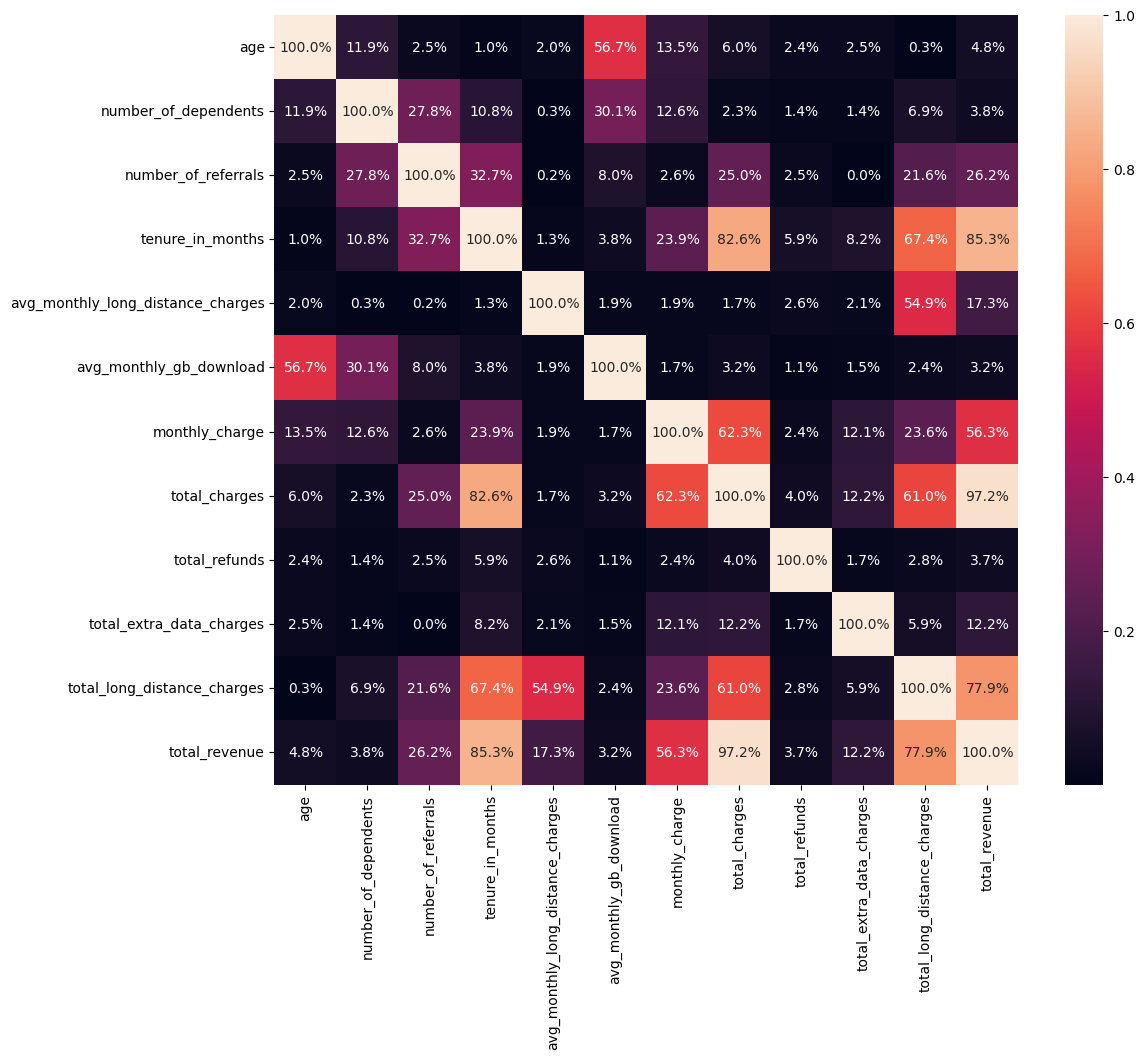

In [51]:
corr_mat = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat.abs(), annot=True, fmt=".1%")

print('The Highest Correlation among Features:')
for x in range(len(data.select_dtypes(include=['number']).columns)):
  corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

In [52]:
data = data.drop(['total_charges'],axis=1)

In [53]:
from scipy.stats import skew
numeric_data = data.select_dtypes(include=['number'])

skewness = numeric_data.apply(skew)

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
age                                  0.162152
number_of_dependents                 2.109483
number_of_referrals                  1.445752
tenure_in_months                     0.240491
avg_monthly_long_distance_charges         NaN
avg_monthly_gb_download                   NaN
monthly_charge                      -0.275335
total_refunds                        4.327595
total_extra_data_charges             4.090338
total_long_distance_charges          1.238018
total_revenue                        0.919214
dtype: float64


In [54]:
from scipy.stats import skew
import numpy as np

columns_to_transform = ['number_of_dependents', 'number_of_referrals', 'total_refunds',
                        'total_extra_data_charges', 'total_long_distance_charges']

for column in columns_to_transform:
    data[f'{column}_sqrt'] = np.sqrt(data[column])
    data[f'{column}_log'] = np.log1p(data[column])

skewness_before = data[columns_to_transform].apply(skew)
skewness_after_sqrt = data[[f'{column}_sqrt' for column in columns_to_transform]].apply(skew)
skewness_after_log = data[[f'{column}_log' for column in columns_to_transform]].apply(skew)

print("Skewness before transformation:")
print(skewness_before)
print("\nSkewness after square root transformation:")
print(skewness_after_sqrt)
print("\nSkewness after log transformation:")
print(skewness_after_log)

Skewness before transformation:
number_of_dependents           2.109483
number_of_referrals            1.445752
total_refunds                  4.327595
total_extra_data_charges       4.090338
total_long_distance_charges    1.238018
dtype: float64

Skewness after square root transformation:
number_of_dependents_sqrt           1.504378
number_of_referrals_sqrt            0.820510
total_refunds_sqrt                  3.693488
total_extra_data_charges_sqrt       3.271733
total_long_distance_charges_sqrt    0.384645
dtype: float64

Skewness after log transformation:
number_of_dependents_log           1.591194
number_of_referrals_log            0.841921
total_refunds_log                  3.485350
total_extra_data_charges_log       2.853981
total_long_distance_charges_log   -1.108219
dtype: float64


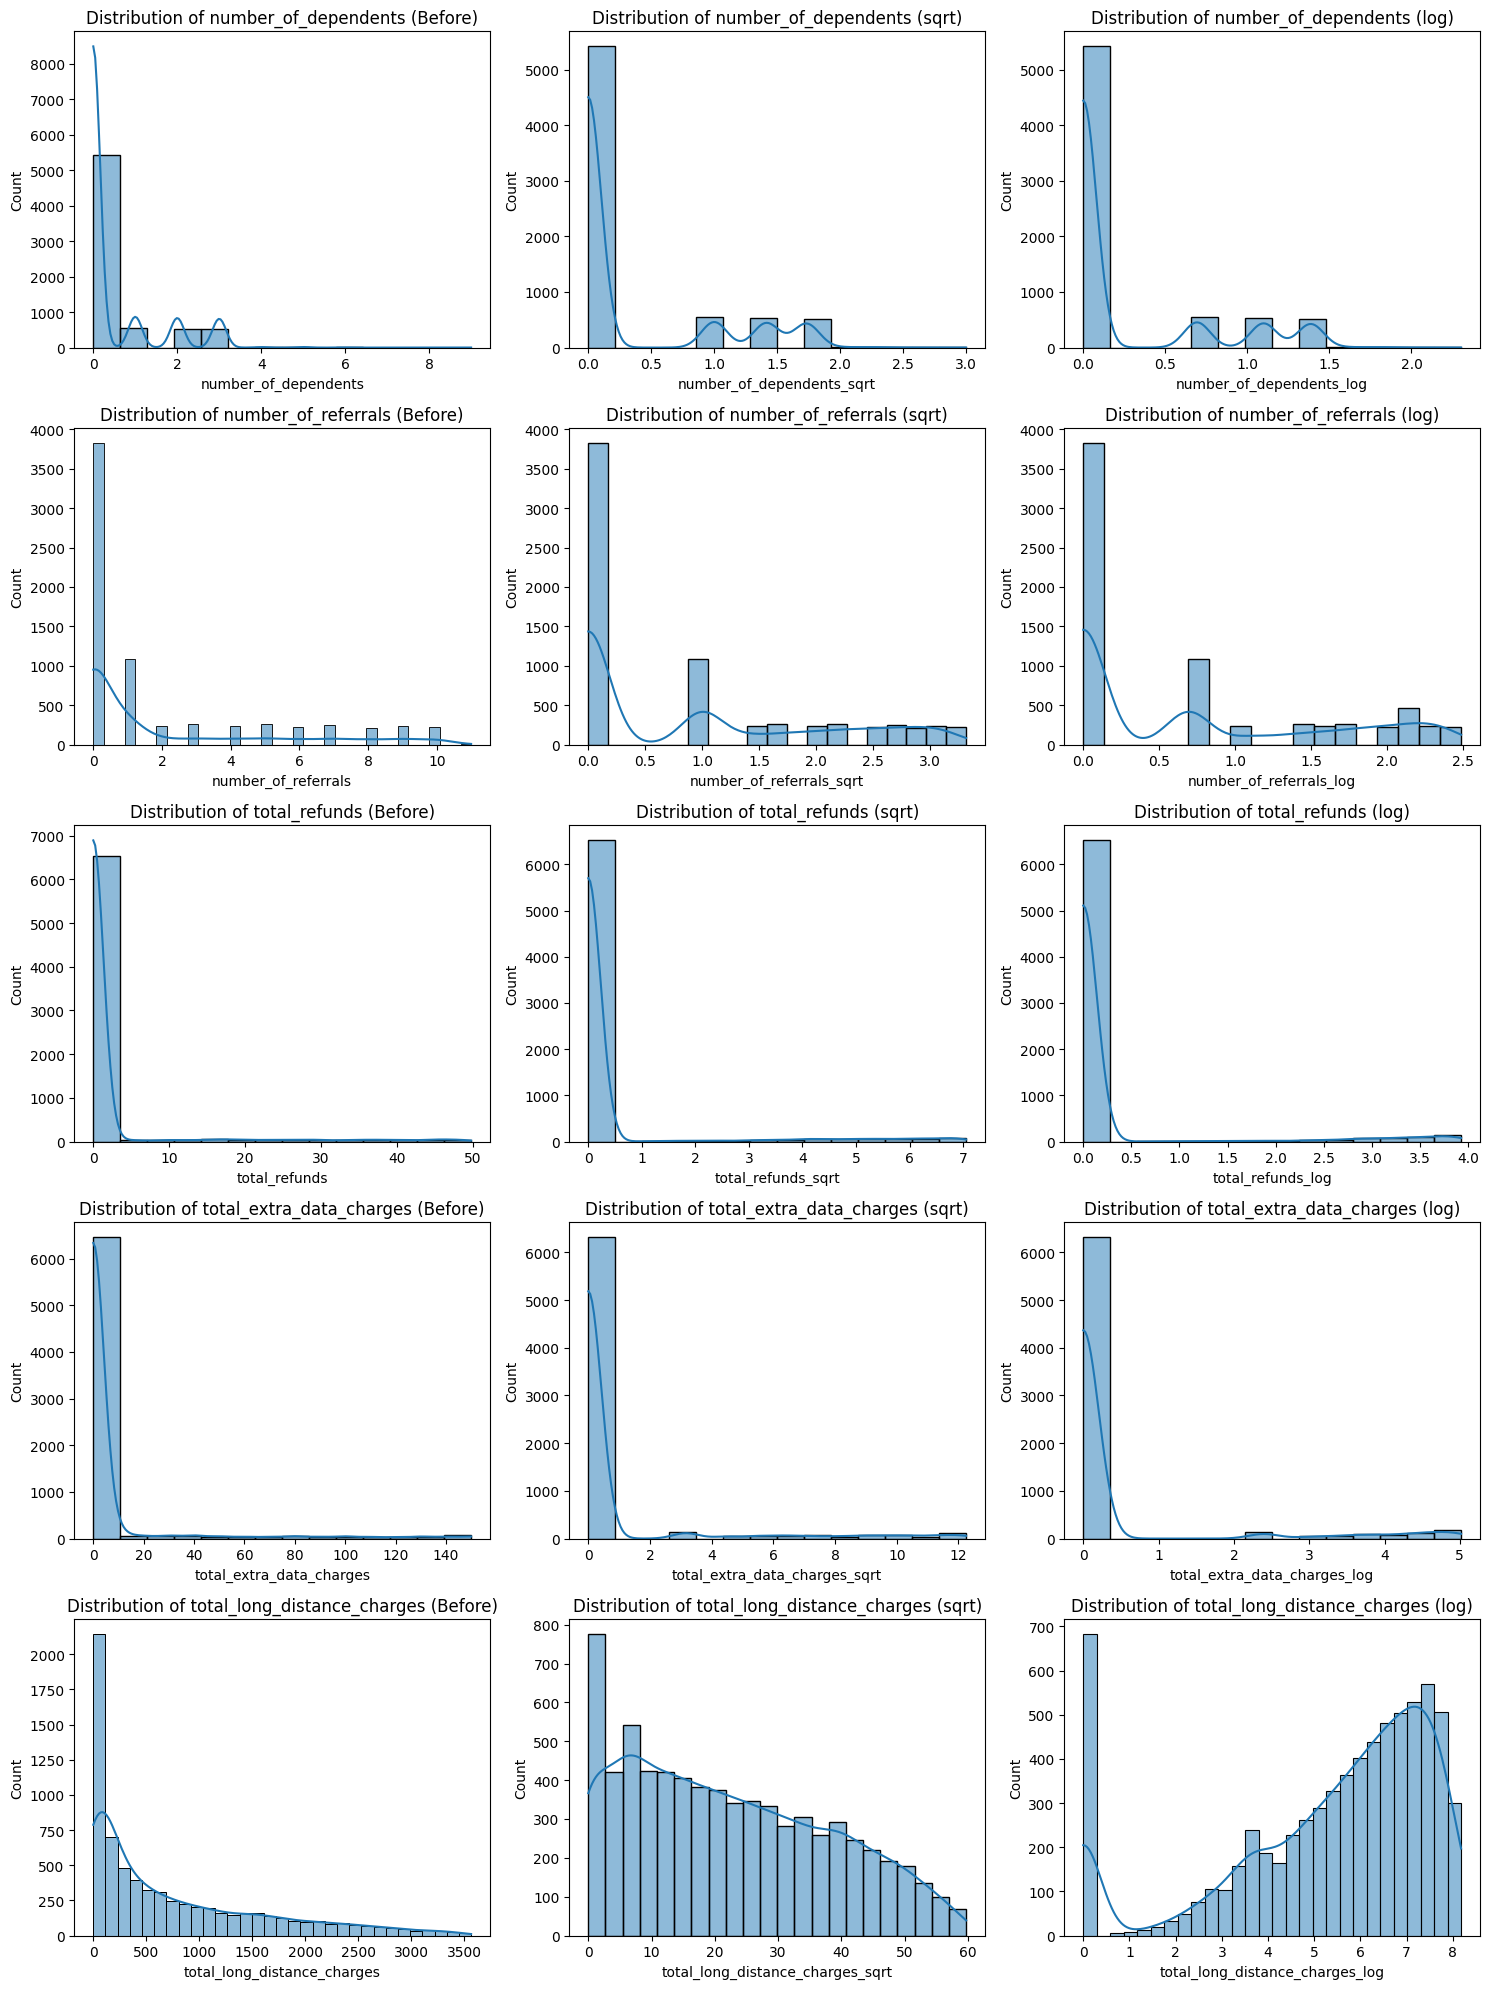

In [55]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for i, column in enumerate(columns_to_transform):
    sns.histplot(data[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} (Before)')

    sns.histplot(data[f'{column}_sqrt'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {column} (sqrt)')

    sns.histplot(data[f'{column}_log'], kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'Distribution of {column} (log)')

plt.tight_layout()
plt.show()

In [56]:
data = data.drop(['number_of_dependents', 'number_of_dependents_log',
                  'number_of_referrals', 'number_of_referrals_log',
                  'total_refunds', 'total_refunds_sqrt',
                  'total_extra_data_charges', 'total_extra_data_charges_sqrt',
                  'total_long_distance_charges', 'total_long_distance_charges_log'], axis=1)

null values in nominal features:
gender                       0
married                      0
offer                     3877
phone_service                0
multiple_lines             682
internet_service             0
internet_type             1526
online_security           1526
online_backup             1526
device_protection_plan    1526
premium_tech_support      1526
streaming_tv              1526
streaming_movies          1526
streaming_music           1526
unlimited_data            1526
contract                     0
paperless_billing            0
payment_method               0
customer_status              0
dtype: int64


<Axes: >

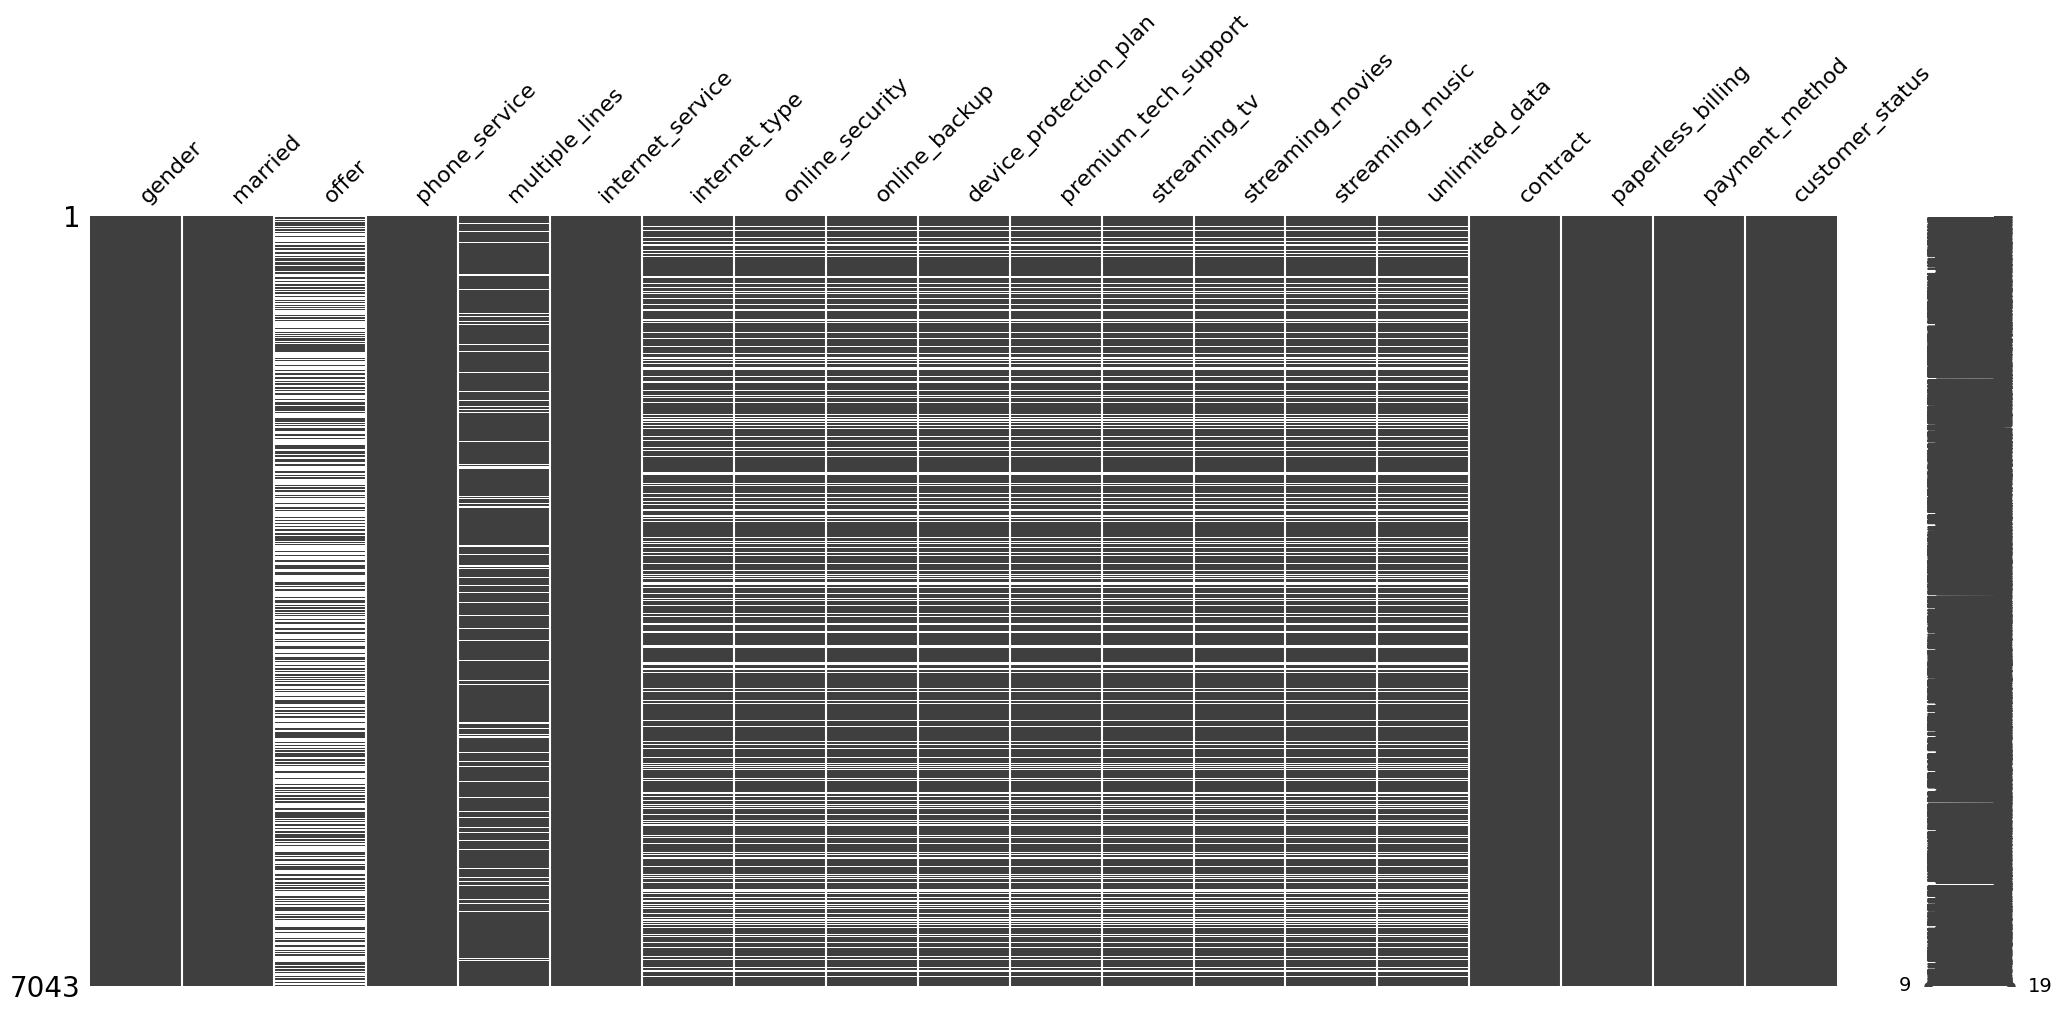

In [57]:
import missingno as msno

print(f"null values in nominal features:\n{data.select_dtypes(include=['object']).isna().sum()}")
msno.matrix(data.select_dtypes(include=['object']))

In [58]:
data['internet_type'] = data['internet_type'].apply(lambda x: 'no_internet_service' if pd.isnull(x) else x)
data['offer'] = data['offer'].apply(lambda x: 'no_offer' if pd.isnull(x) else x)

column_name = ['online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support',
               'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data']
for column in column_name:
  data[column] = data[column].apply(lambda x: 'no_internet_service' if pd.isnull(x) else x)

<Axes: >

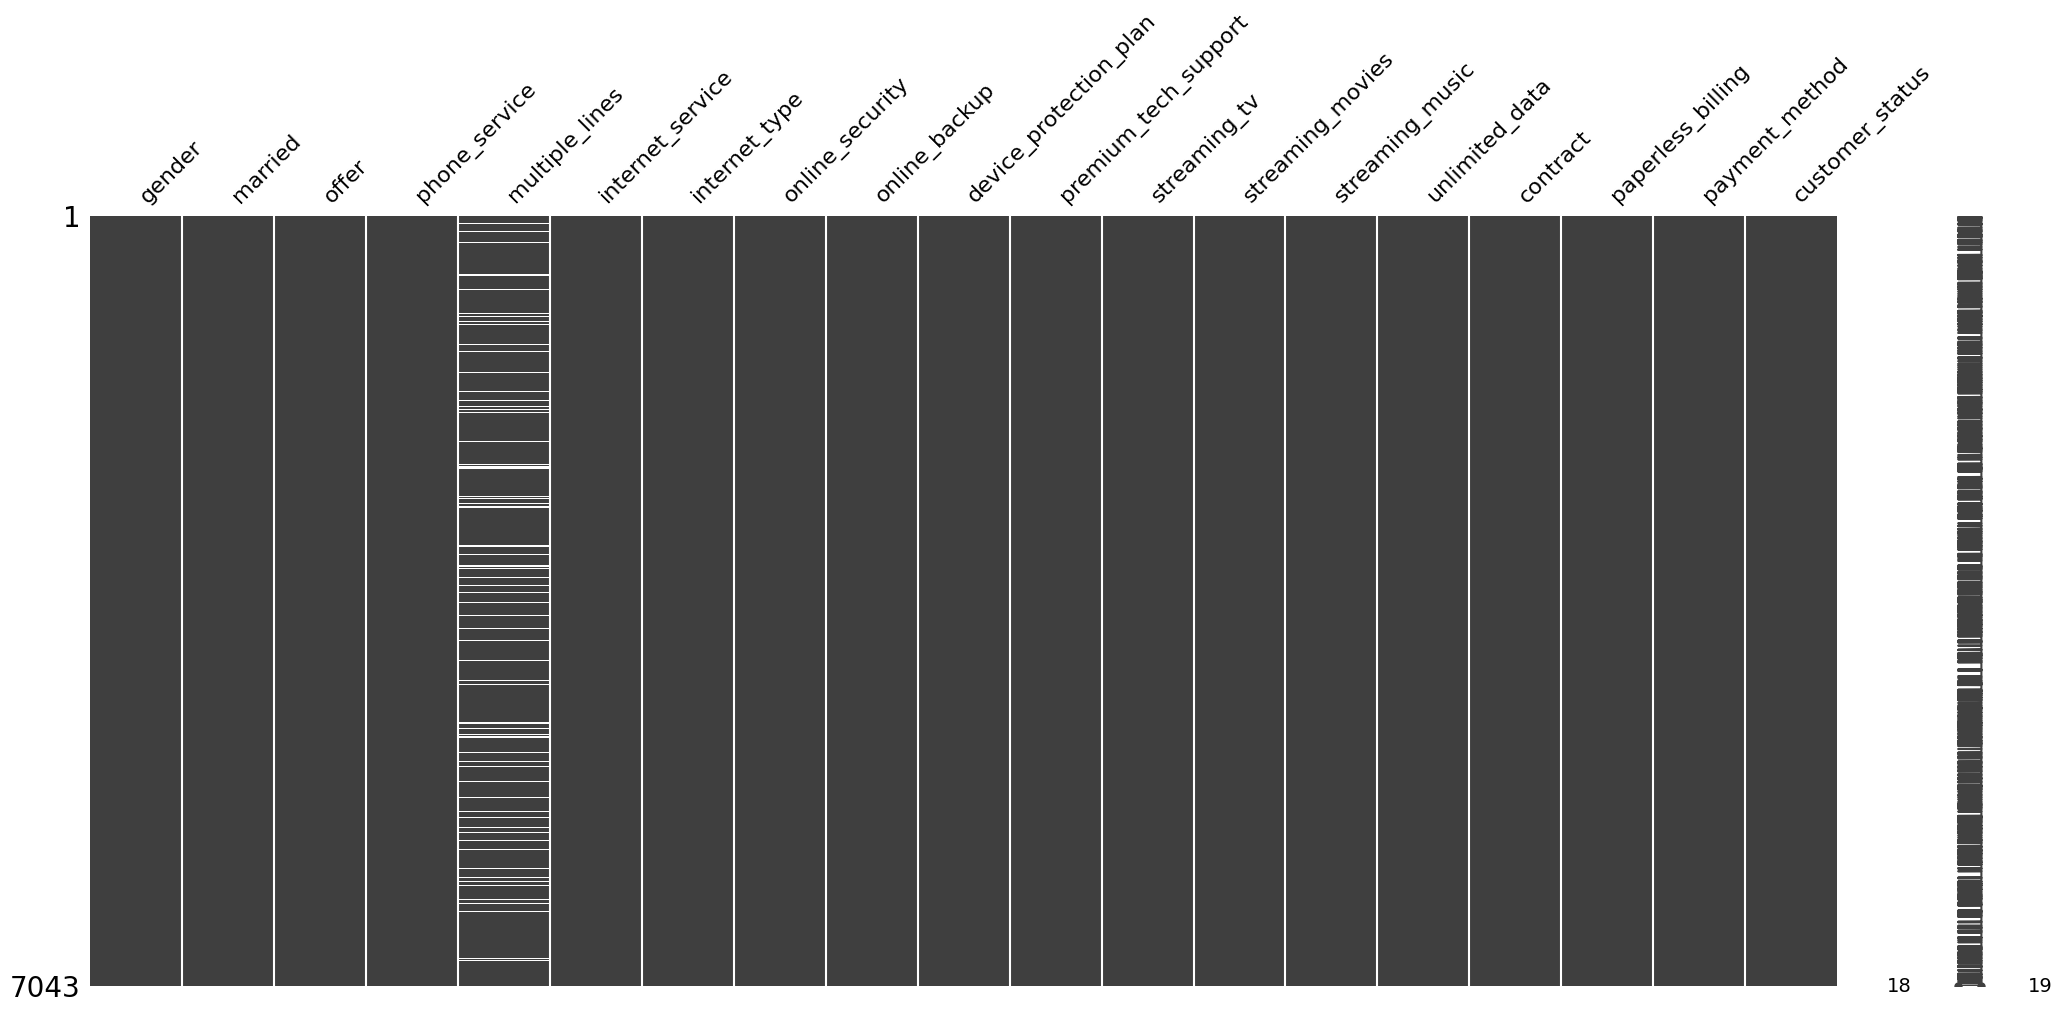

In [59]:
msno.matrix(data.select_dtypes(include=['object']))


In [60]:
print("null values in numerical features:\n",data.select_dtypes(include=['number']).isna().sum())

null values in numerical features:
 age                                     0
tenure_in_months                        0
avg_monthly_long_distance_charges     682
avg_monthly_gb_download              1526
monthly_charge                          0
total_revenue                           0
number_of_dependents_sqrt               0
number_of_referrals_sqrt                0
total_refunds_log                       0
total_extra_data_charges_log            0
total_long_distance_charges_sqrt        0
dtype: int64


In [61]:
column_name = ['avg_monthly_long_distance_charges', 'avg_monthly_gb_download']
for column in column_name:
  data[column] = data[column].apply(lambda x: 0 if pd.isnull(x) else x)

null values in numerical features:
 age                                  0
tenure_in_months                     0
avg_monthly_long_distance_charges    0
avg_monthly_gb_download              0
monthly_charge                       0
total_revenue                        0
number_of_dependents_sqrt            0
number_of_referrals_sqrt             0
total_refunds_log                    0
total_extra_data_charges_log         0
total_long_distance_charges_sqrt     0
dtype: int64


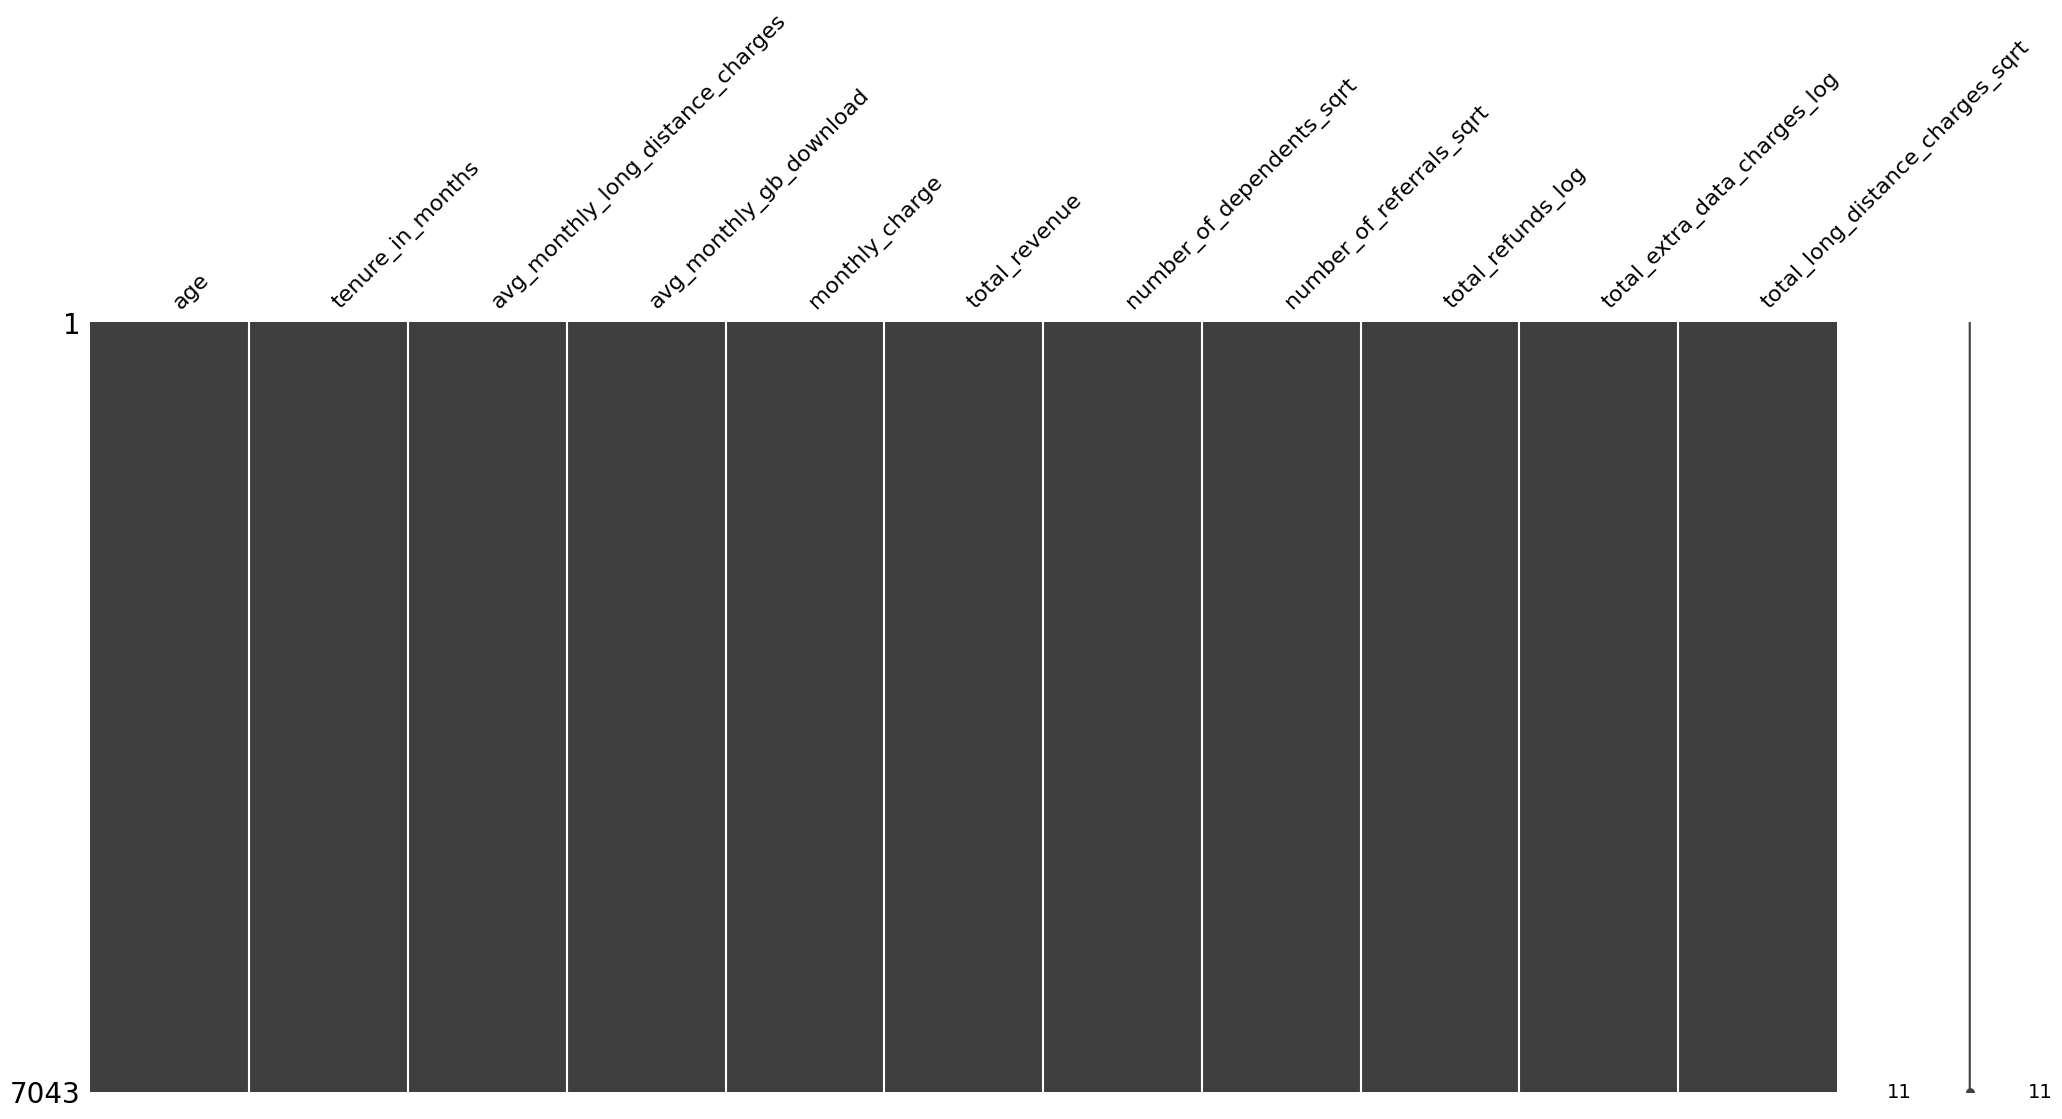

In [62]:
msno.matrix(data.select_dtypes(include=['number']))
print("null values in numerical features:\n",data.select_dtypes(include=['number']).isna().sum())

In [63]:
from sklearn.preprocessing import LabelEncoder
conversion_dict = {"Yes": 1, "No": 0}
data['multiple_lines'] = data['multiple_lines'].map(conversion_dict)

label_encoder = LabelEncoder()
data['customer_status'] = label_encoder.fit_transform(data['customer_status'])

data = pd.get_dummies(data, drop_first=True)



In [64]:
data.columns

Index(['age', 'tenure_in_months', 'avg_monthly_long_distance_charges',
       'multiple_lines', 'avg_monthly_gb_download', 'monthly_charge',
       'total_revenue', 'customer_status', 'number_of_dependents_sqrt',
       'number_of_referrals_sqrt', 'total_refunds_log',
       'total_extra_data_charges_log', 'total_long_distance_charges_sqrt',
       'gender_Male', 'married_Yes', 'offer_Offer B', 'offer_Offer C',
       'offer_Offer D', 'offer_Offer E', 'offer_no_offer', 'phone_service_Yes',
       'internet_service_Yes', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_no_internet_service',
       'online_security_Yes', 'online_security_no_internet_service',
       'online_backup_Yes', 'online_backup_no_internet_service',
       'device_protection_plan_Yes',
       'device_protection_plan_no_internet_service',
       'premium_tech_support_Yes', 'premium_tech_support_no_internet_service',
       'streaming_tv_Yes', 'streaming_tv_no_internet_service',
       'stream

In [65]:
from sklearn.impute import KNNImputer

label_column = data['customer_status']
data = data.drop(columns=['customer_status'])

imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(data)

data = pd.DataFrame(data=imputed_data, columns=data.columns)


data['multiple_lines'] = data['multiple_lines'].apply(lambda x: round(x))

data['customer_status'] = label_column


<Axes: >

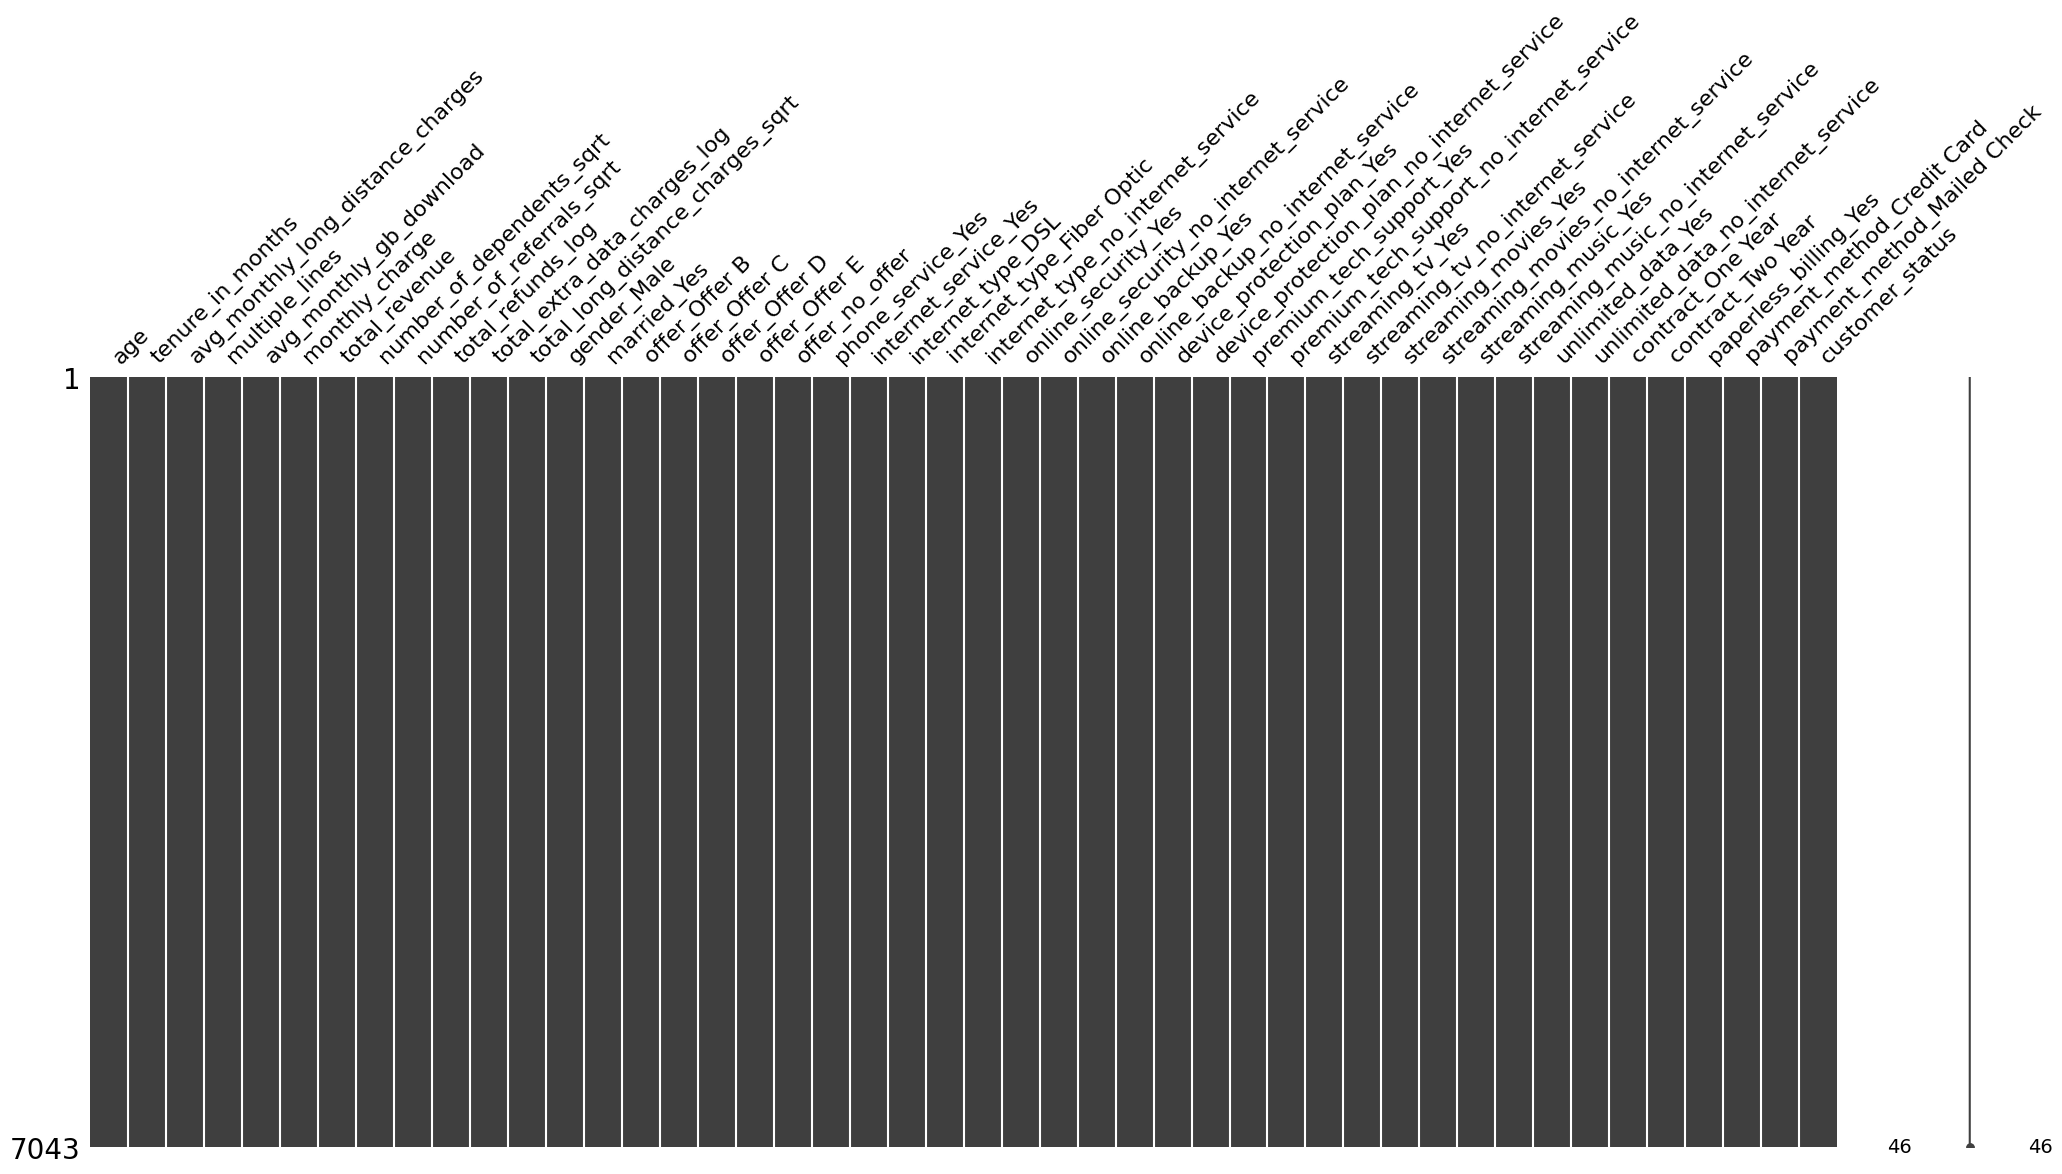

In [66]:
msno.matrix(data)

In [67]:
from sklearn.model_selection import train_test_split

X = data.drop(['customer_status'], axis=1)
y = data.loc[:, 'customer_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=data.customer_status)

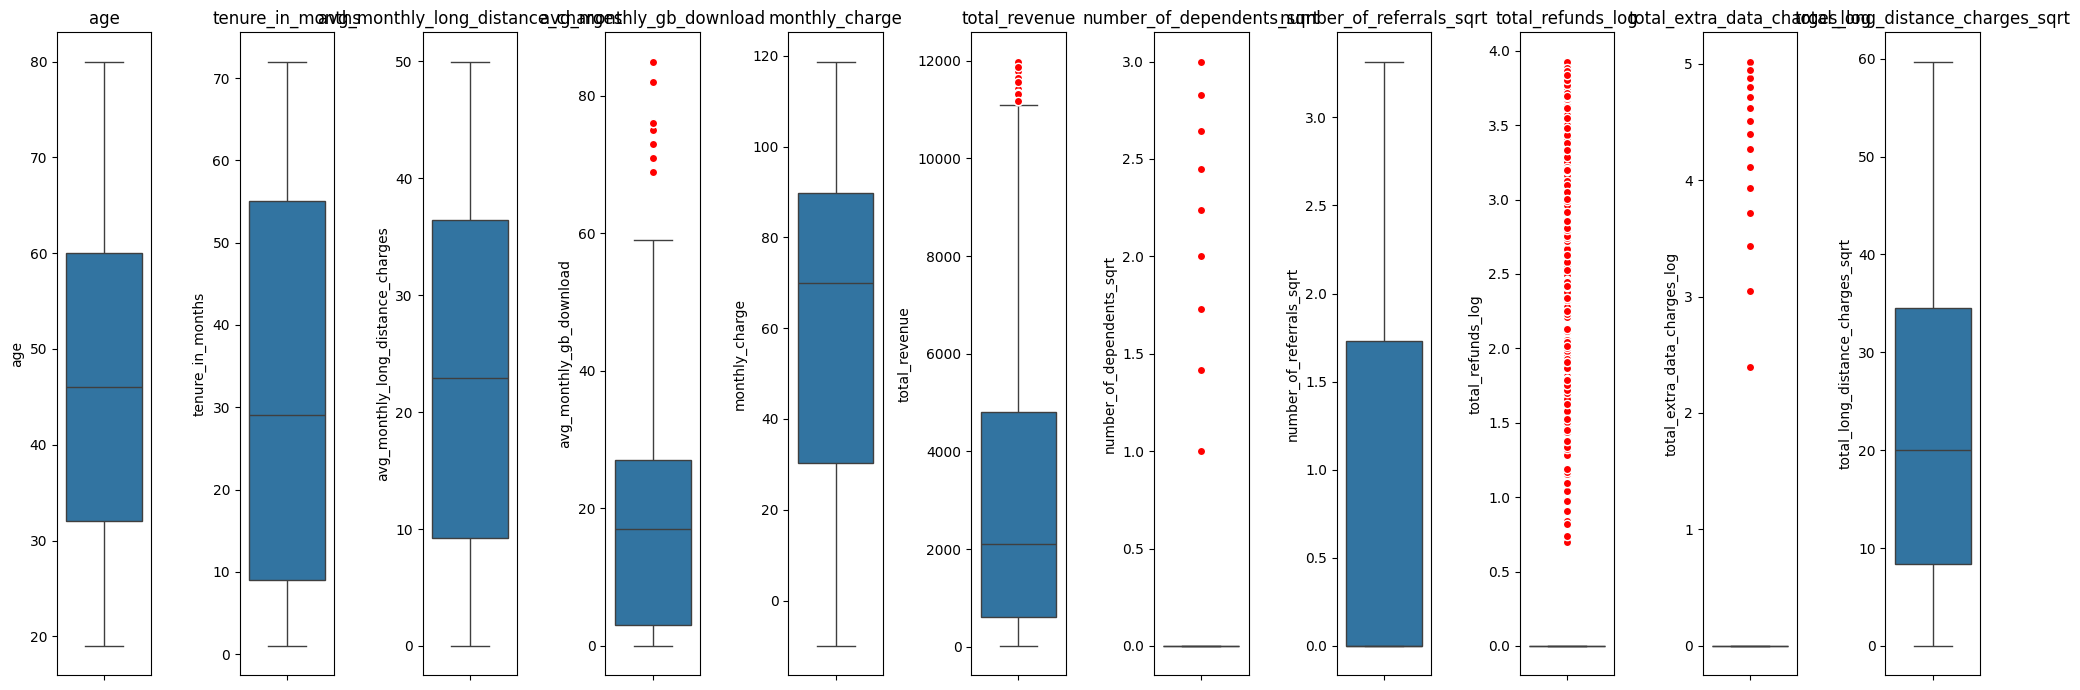

In [68]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

numerical_columns = ['age', 'tenure_in_months', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge',
                  'total_revenue', 'number_of_dependents_sqrt', 'number_of_referrals_sqrt', 'total_refunds_log',
                  'total_extra_data_charges_log', 'total_long_distance_charges_sqrt']

num_plots = len(numerical_columns)

fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(20, 7))

for index, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[index], flierprops=red_circle)
    axes[index].set_ylabel(col)
    axes[index].set_title(col)

plt.tight_layout()
plt.show()

In [69]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [70]:
outlier_detection = data[numerical_columns]
for k, v in outlier_detection.items():
        outliers = find_outliers_IQR(v)
        perc = len(find_outliers_IQR(v)) * 100.0 / np.shape(outlier_detection)[0]
        print(f'Column :{k}')
        print(f"Number of Outliers = {len(outliers)}","||",f"Max Outlier Value = {outliers.max()}",
              "||", f"Min Outlier Value = {outliers.min()}", "||", f"Percentage of Outliers = {perc:.2f}%")
        print("\n")

Column :age
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :tenure_in_months
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :avg_monthly_long_distance_charges
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :avg_monthly_gb_download
Number of Outliers = 362 || Max Outlier Value = 85.0 || Min Outlier Value = 69.0 || Percentage of Outliers = 5.14%


Column :monthly_charge
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :total_revenue
Number of Outliers = 21 || Max Outlier Value = 11979.34 || Min Outlier Value = 11169.77 || Percentage of Outliers = 0.30%


Column :number_of_dependents_sqrt
Number of Outliers = 1627 || Max Outlier Value = 3.0 || Min Outlier Value = 1.0 || Percentage of Outliers = 23.10%




In [71]:
def handle_outliers(X_train, X_test, columns):
    for col in columns:
        Q1 = np.percentile(X_train[col], 25)
        Q3 = np.percentile(X_train[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        X_train[col] = np.where(X_train[col] < lower_bound, lower_bound, X_train[col])
        X_train[col] = np.where(X_train[col] > upper_bound, upper_bound, X_train[col])

        X_test[col] = np.where(X_test[col] < lower_bound, lower_bound, X_test[col])
        X_test[col] = np.where(X_test[col] > upper_bound, upper_bound, X_test[col])

    return X_train, X_test


columns_to_handle = ['avg_monthly_gb_download', 'total_revenue', 'number_of_dependents_sqrt',
                     'total_refunds_log', 'total_extra_data_charges_log']

X_train, X_test = handle_outliers(X_train, X_test, columns_to_handle)

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [73]:
y_train_counts = pd.Series(y_train).value_counts()

print("Counts of each class in y_train:")
print(y_train_counts)

Counts of each class in y_train:
2    3776
0    1495
1     363
Name: count, dtype: int64


In [74]:
from imblearn.combine import SMOTETomek
from collections import Counter

sampling_strategy = {
    0: 3000,
    1: 1000,
    2: 3776
}

smote_tomek = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))


Original dataset shape: Counter({np.int64(2): 3776, np.int64(0): 1495, np.int64(1): 363})
Resampled dataset shape: Counter({np.int64(2): 3693, np.int64(0): 2920, np.int64(1): 979})


In [75]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

y_pred_logreg = logreg.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

target_names = {0: 'Churned', 1: 'Joined', 2: 'Stayed'}
labels = sorted(target_names.keys())

print("Classification Report (Logistic Regression):\n")
report = classification_report(y_test, y_pred_logreg, target_names=[target_names[i] for i in labels], output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(3))  # rounded to 3 decimal places

print("\nConfusion Matrix (Logistic Regression):\n")
cm = confusion_matrix(y_test, y_pred_logreg, labels=labels)
cm_df = pd.DataFrame(cm, index=[f"Actual {target_names[i]}" for i in labels],
                        columns=[f"Predicted {target_names[i]}" for i in labels])
print(cm_df)

logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"\nAccuracy (Logistic Regression): {logreg_accuracy:.4f}")


Classification Report (Logistic Regression):

              precision  recall  f1-score   support
Churned           0.606   0.759     0.674   374.000
Joined            0.615   0.703     0.656    91.000
Stayed            0.929   0.823     0.873   944.000
accuracy          0.798   0.798     0.798     0.798
macro avg         0.717   0.762     0.734  1409.000
weighted avg      0.823   0.798     0.806  1409.000

Confusion Matrix (Logistic Regression):

                Predicted Churned  Predicted Joined  Predicted Stayed
Actual Churned                284                32                58
Actual Joined                  26                64                 1
Actual Stayed                 159                 8               777

Accuracy (Logistic Regression): 0.7984


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)

target_names = {0: 'Churned', 1: 'Joined', 2: 'Stayed'}
labels = sorted(target_names.keys())

print("Classification Report (Random Forest):\n")
rf_report = classification_report(y_test, y_pred_rf, target_names=[target_names[i] for i in labels], output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()
print(rf_report_df.round(3))

print("\nConfusion Matrix (Random Forest):\n")
rf_cm = confusion_matrix(y_test, y_pred_rf, labels=labels)
rf_cm_df = pd.DataFrame(rf_cm, index=[f"Actual {target_names[i]}" for i in labels],
                        columns=[f"Predicted {target_names[i]}" for i in labels])
print(rf_cm_df)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy (Random Forest): {rf_accuracy:.4f}")


Classification Report (Random Forest):

              precision  recall  f1-score   support
Churned           0.672   0.690     0.681   374.000
Joined            0.726   0.670     0.697    91.000
Stayed            0.901   0.898     0.900   944.000
accuracy          0.828   0.828     0.828     0.828
macro avg         0.766   0.753     0.759  1409.000
weighted avg      0.829   0.828     0.829  1409.000

Confusion Matrix (Random Forest):

                Predicted Churned  Predicted Joined  Predicted Stayed
Actual Churned                258                23                93
Actual Joined                  30                61                 0
Actual Stayed                  96                 0               848

Accuracy (Random Forest): 0.8282


In [78]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'learning_rate': [0.2],
    'max_depth': [7],
    'n_estimators': [500],
    'subsample': [1.0],
    'colsample_bytree': [0.8],
}


xgb_model = xgb.XGBClassifier(use_label_encoder=False)



stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=stratified_kfold,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'
)

grid_search_xgb.fit(X_train_resampled, y_train_resampled)

best_params = grid_search_xgb.best_params_
best_score = grid_search_xgb.best_score_

print(f"Best parameters in XGBoost: {best_params}")
print(f"Best cross-validation score in XGBoost: {best_score:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters in XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 500, 'subsample': 1.0}
Best cross-validation score in XGBoost: 0.8858


In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import matplotlib.pyplot as plt

best_model = grid_search_xgb.best_estimator_

y_pred = best_model.predict(X_test)

target_names = {0: 'Churned', 1: 'Joined', 2: 'Stayed'}
labels = sorted(target_names.keys())


print("\nClassification Report (XGBoost):\n")
print(classification_report(y_test, y_pred, target_names=[target_names[i] for i in labels]))


cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm,
                     index=[f"Actual {target_names[i]}" for i in labels],
                     columns=[f"Predicted {target_names[i]}" for i in labels])

print("\nConfusion Matrix (XGBoost):\n")
print(cm_df)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (XGBoost): {accuracy:.4f}")





Classification Report (XGBoost):

              precision    recall  f1-score   support

     Churned       0.70      0.68      0.69       374
      Joined       0.71      0.66      0.69        91
      Stayed       0.90      0.92      0.91       944

    accuracy                           0.84      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.83      0.84      0.83      1409


Confusion Matrix (XGBoost):

                Predicted Churned  Predicted Joined  Predicted Stayed
Actual Churned                253                24                97
Actual Joined                  31                60                 0
Actual Stayed                  79                 0               865

Accuracy (XGBoost): 0.8361


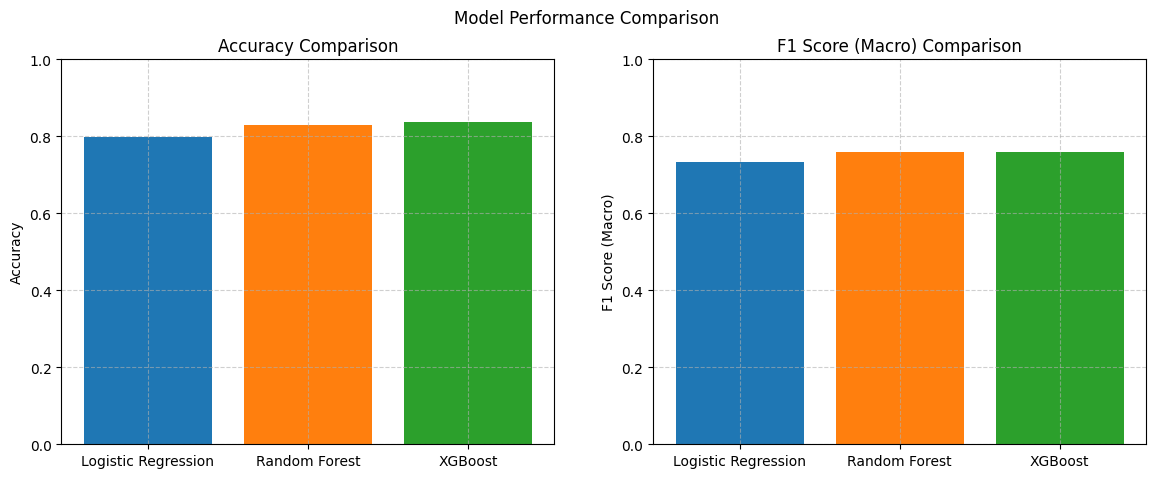

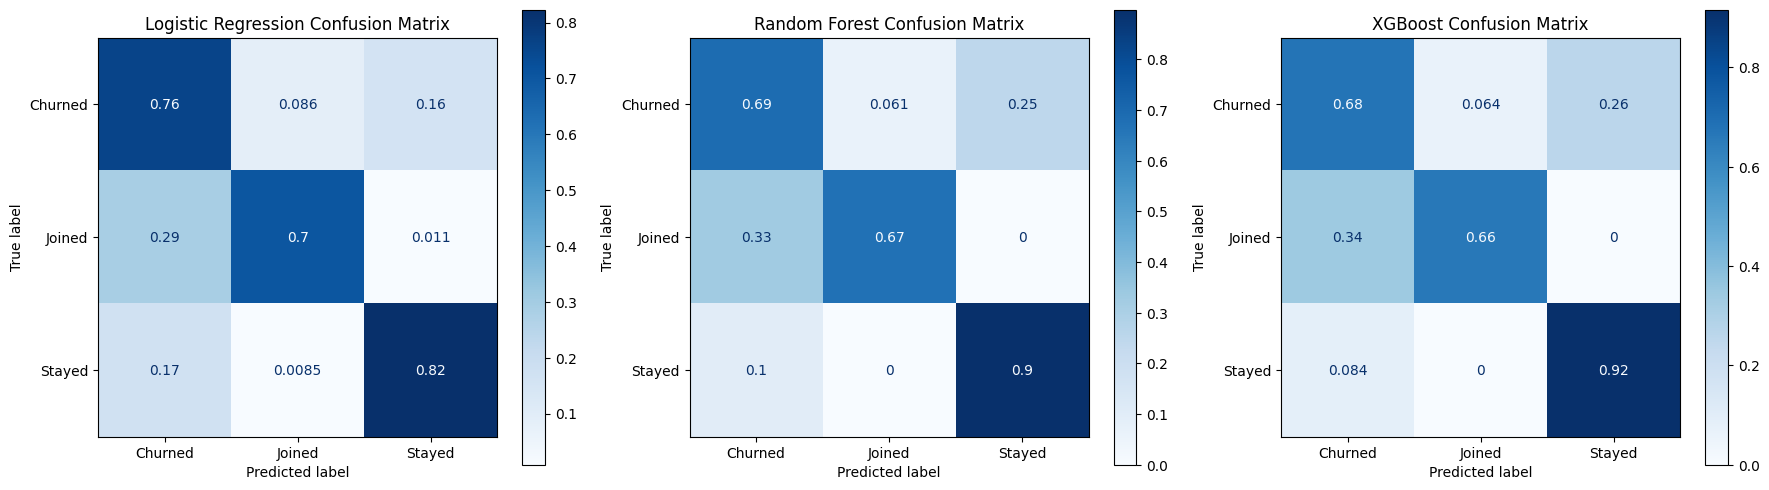

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
y_preds = [y_pred_logreg, y_pred_rf, y_pred]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

target_names = {0: 'Churned', 1: 'Joined', 2: 'Stayed'}
labels = sorted(target_names.keys())

accuracy_scores = {}
f1_scores = {}

for model_name, y_pred_model in zip(model_names, y_preds):
    accuracy = accuracy_score(y_test, y_pred_model)
    f1 = f1_score(y_test, y_pred_model, average='macro')
    accuracy_scores[model_name] = accuracy
    f1_scores[model_name] = f1

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)
axs[0].set_title('Accuracy Comparison')
axs[0].set_ylim(0, 1)
axs[0].set_ylabel('Accuracy')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].bar(f1_scores.keys(), f1_scores.values(), color=colors)
axs[1].set_title('F1 Score (Macro) Comparison')
axs[1].set_ylim(0, 1)
axs[1].set_ylabel('F1 Score (Macro)')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Model Performance Comparison')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, model_name, y_pred_model, color in zip(axes, model_names, y_preds, colors):
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred_model,
        labels=labels,
        display_labels=[target_names[i] for i in labels],
        cmap=plt.cm.Blues,
        ax=ax,
        normalize='true'
    )
    ax.set_title(f"{model_name} Confusion Matrix")

plt.tight_layout()
plt.show()
